In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
df = pd.read_csv('car_prices.csv', encoding= 'unicode_escape')

In [55]:
df.shape

(558837, 16)

In [56]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [58]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [59]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df['saledate'] = pd.to_datetime(df['saledate'], format='%Y-%m-%d %H:%M:%S', utc=True, errors='coerce')

In [63]:
df['saledate'].dtypes

datetime64[ns, UTC]

In [64]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [65]:
df[['year', 'mmr', 'sellingprice']].describe()

,year,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000
mean,2010.210980,13837.058964,13690.512058
std,3.822151,9532.229273,9613.033738
min,1990.000000,25.000000,1.000000
25%,2008.000000,7425.000000,7200.000000
50%,2012.000000,12300.000000,12200.000000
75%,2013.000000,18300.000000,18200.000000
max,2015.000000,182000.000000,230000.000000


In [66]:
df = df[df['color'] != 'â']

In [67]:
print(df['interior'].value_counts())

interior
black        199015
gray         146594
beige         48076
tan           35657
â            9864
brown          6675
red            1054
silver          972
blue            898
purple          269
gold            262
off-white       249
white           199
green           191
burgundy        143
orange          120
yellow           19
Name: count, dtype: int64


In [68]:
df = df[df['interior'] != 'â']

# Exploratory Data Analysis

### Average Selling Price by Car Make

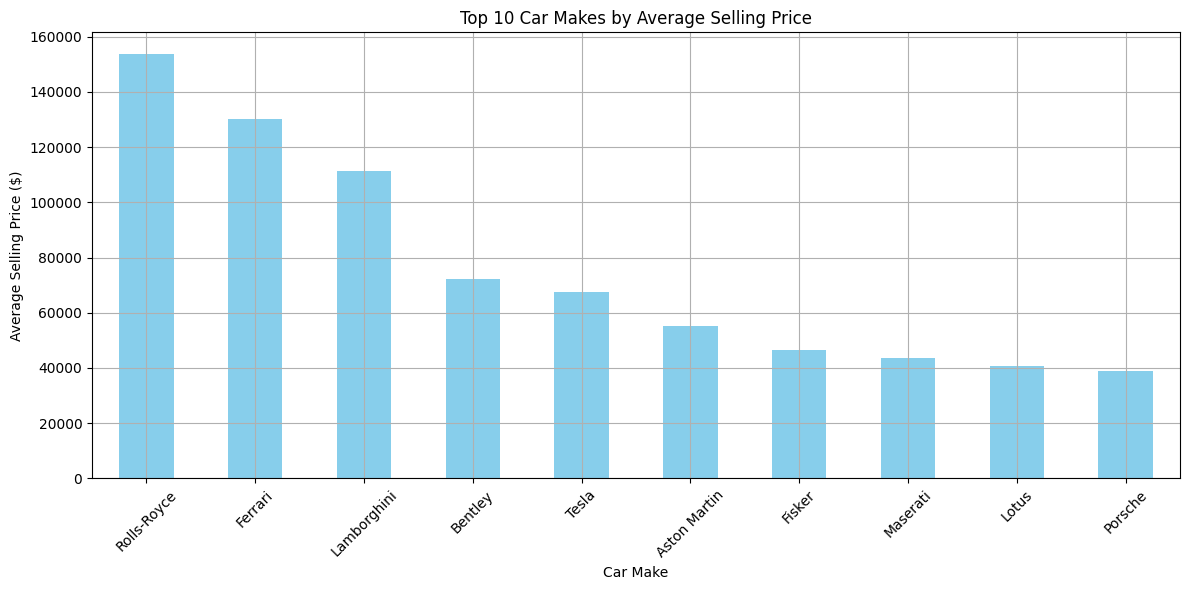

In [69]:
# Group by car make and calculate average selling price
make_price = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

# Show top 15 most expensive car brands
top_10_makes = make_price.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_makes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Car Makes by Average Selling Price")
plt.ylabel("Average Selling Price ($)")
plt.xlabel("Car Make")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*As shown in the graph, the top car makes are ranked by their average selling price.*

### Top make

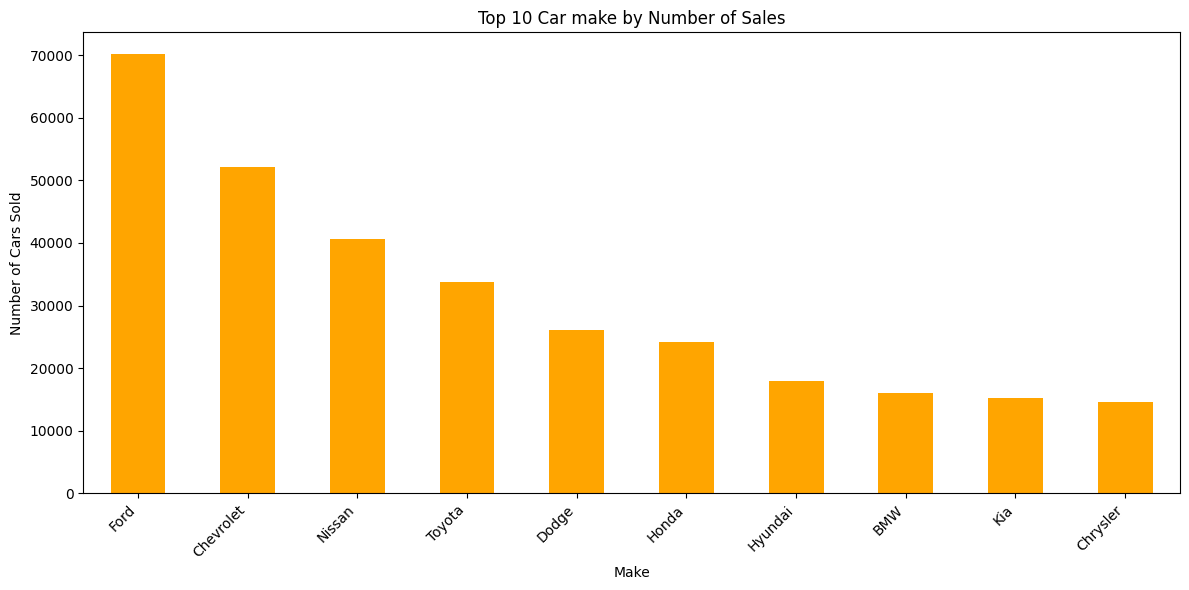

In [70]:
top_make = df['make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_make.plot(kind='bar', color='orange')
plt.title('Top 10 Car make by Number of Sales')
plt.xlabel('Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*According to the graph, these are the leading car makes in terms of sales volume.*

### State-wise Average Selling Price

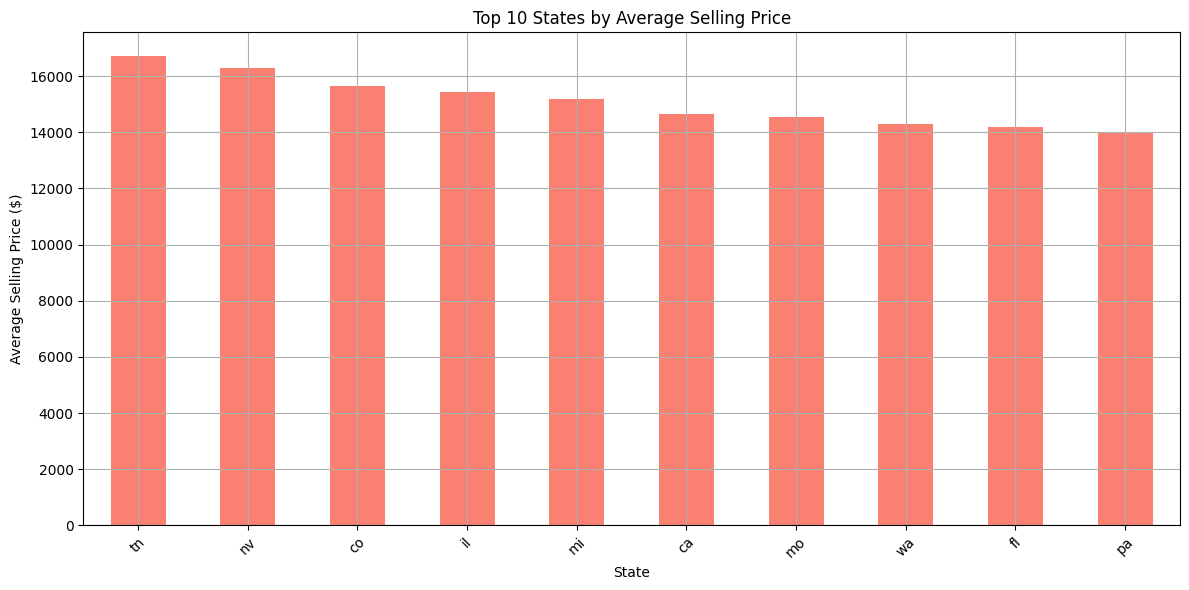

In [71]:
state_price = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False)

# show top 10 states
top_10_states = state_price.head(10)

#plotting
plt.figure(figsize=(12, 6))
top_10_states.plot(kind= 'bar', color='salmon')
plt.title('Top 10 States by Average Selling Price')
plt.ylabel('Average Selling Price ($)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*According to the graph, the top ten states with the highest average vehicle selling prices are displayed*

### Selling Price vs Car Condition

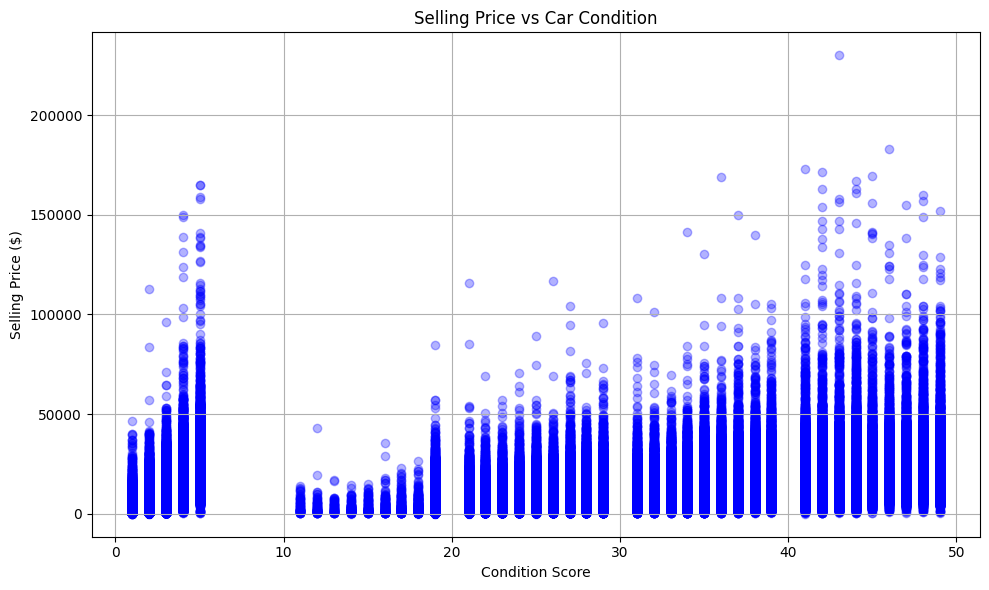

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df['condition'], df['sellingprice'], alpha=0.3, color='blue')
plt.title('Selling Price vs Car Condition')
plt.xlabel('Condition Score')
plt.ylabel('Selling Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


*The graph indicates that better car condition is generally associated with higher selling prices*

### Selling Price vs Odometer Reading

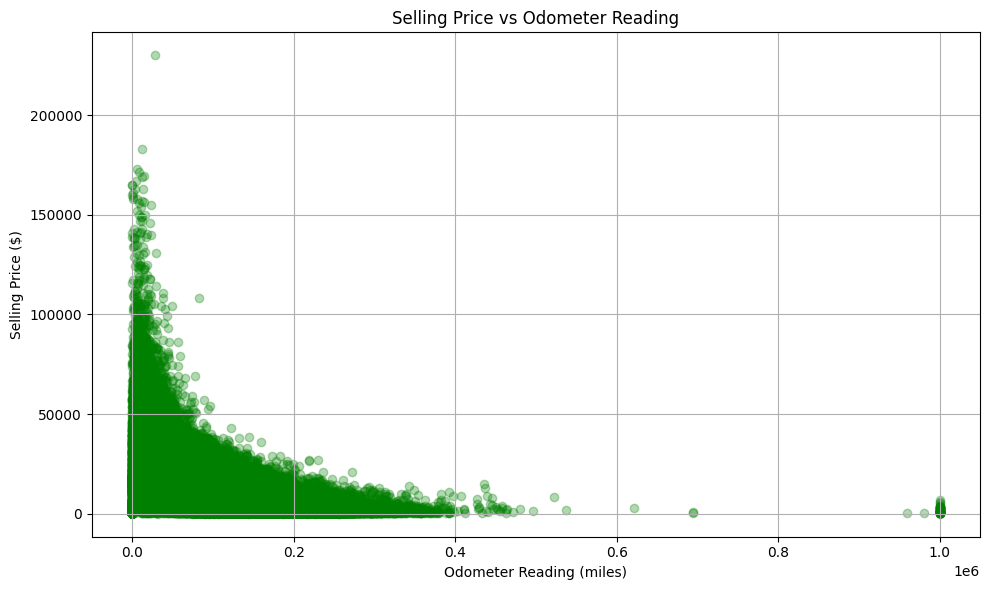

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['sellingprice'], alpha=0.3, color='green')
plt.title('Selling Price vs Odometer Reading')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Selling Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

*The results indicate that vehicles with higher odometer readings generally have lower selling prices, as shown in the graph above.*

### Average Selling price by Year

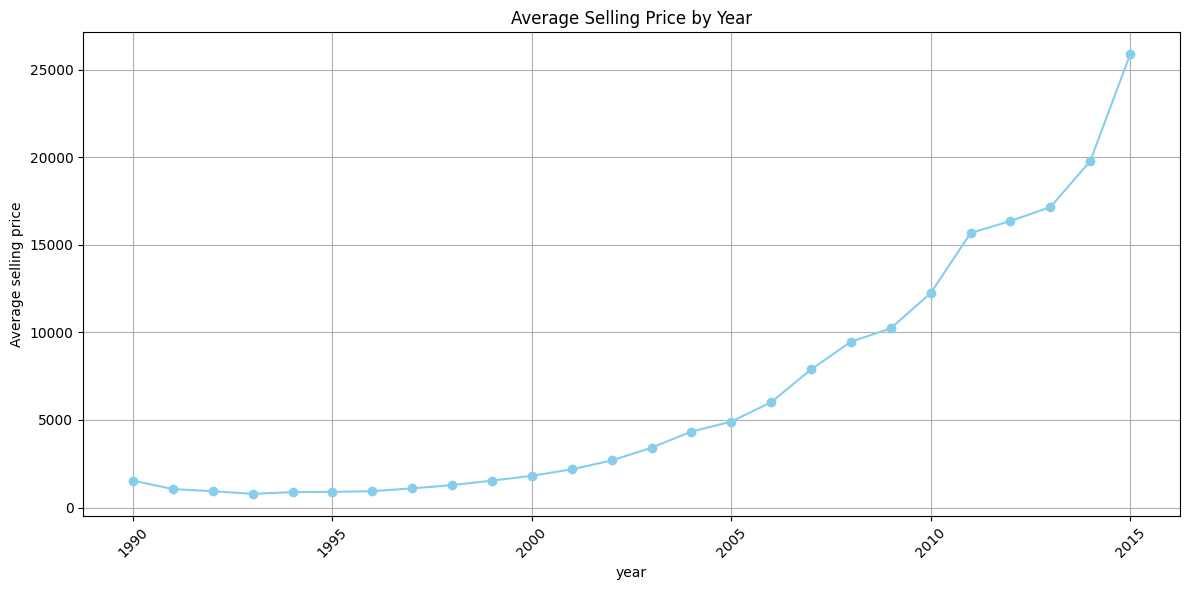

In [74]:
avg_price_per_year = df.groupby('year')['sellingprice'].mean()

plt.figure(figsize=(12, 6))
avg_price_per_year.plot(kind='line', color='skyblue', marker='o')
plt.xlabel('year')
plt.ylabel('Average selling price')
plt.title('Average Selling Price by Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*As shown in the graph, the average selling price steadily increased from 1990 to 2015*

### Transmission Type vs Selling Price

Text(0.5, 1.0, 'Total Selling Price by Transmission Type')

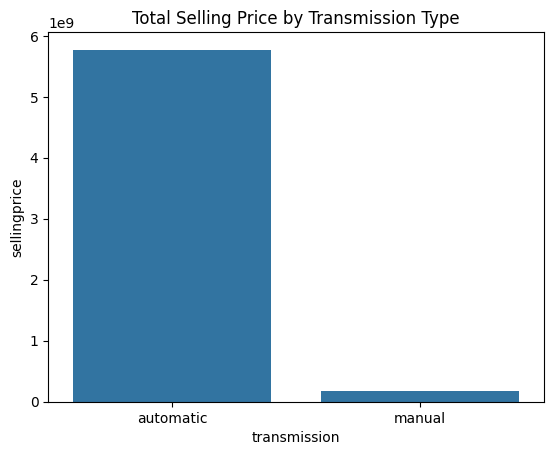

In [75]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['transmission'], as_index=False)['sellingprice'].sum().sort_values(by='sellingprice', ascending=False)

sns.barplot(x = 'transmission',y= 'sellingprice' ,data = sales_gen)
plt.title('Total Selling Price by Transmission Type')

*The visualization illustrates variations in average selling price by transmission type, which indicate that the most of consumers preference is automatic transmission*

### Interior or Color Preferences

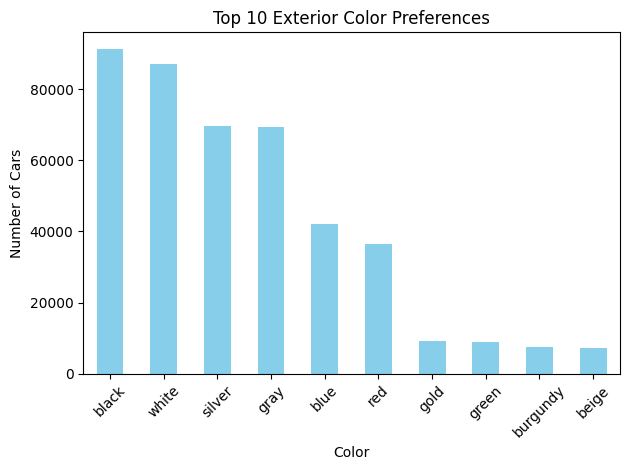

In [76]:
df['color'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Exterior Color Preferences')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*From the graph above, we can observe the top 10 exterior color preferences*

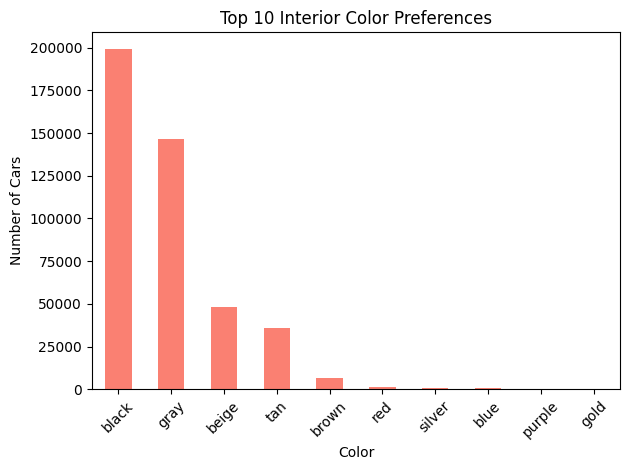

In [77]:
df['interior'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Interior Color Preferences')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*From the above graph we can see that most of the buyers prefer black and gray interior colour*

## Conclusion 

###

*In conclusion, The analysis reveals key factors influencing car selling prices. Transmission type, odometer reading, car condition, location, and make all play significant roles. Automatic cars generally command higher prices than manual ones, and vehicles in better condition or with lower mileage tend to sell for more. Additionally, certain states and car makes consistently show higher average selling prices, indicating regional and brand-based market preferences. These insights can guide both buyers and sellers in making informed decisions within the used car market.*

*Thank You!*